In [5]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize
from featureAnalysis import featureSelection
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [2]:
#Load Edgelists

# Initialize edgelist collector object
graph_collector = edge_terrier('/Users/paigefrank/Library/Python/3.6/bin/aws', 1 , filepath='hbn/derivatives/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_edgelist_all()
# Get a list of just the network x objects
graphList = graph_collector.getGraphs(filelist)

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.


In [13]:
#Output feature matrix to a file
numFeatures = 2

#UNCOMMENT TO USE EIGENVECTOR CENTRALITY
# featureObj = featureSelection(graphList[0])
# X = featureObj.eigenvectorCentrality(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")


#UNCOMMENT TO USE EIGEN VALUES OF LAPLACIAN
featureObj = featureSelection(graphList[0])
X = featureObj.calc_eigval_feature_matrix(numFeatures)
mat = np.matrix(X, dtype = float)
with open('outfileMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")


#UNCOMMENT TO USE KHOP
# featureObj = featureSelection(graphList[0])
# X = featureObj.getKhopFeatMat(numFeatures)
# mat = np.matrix(X, dtype = float)
# with open('outfileMat.txt','wb') as f:
#     for line in mat:
#         np.savetxt(f, line, fmt='%.2f')
# print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")

[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 2, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 48, 48, 48, 48, 48, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
Feature matrix of shape (97, 2) outputted. Run Urerf in R now.


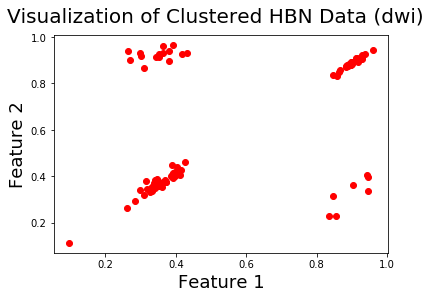

In [6]:
#Graph the data if the features are less than 3 dimensions

if (numFeatures == 2):
    fig = plt.figure()
    plt.plot(mat[:,0], mat[:,1],'ro')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
if (numFeatures == 3):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = mat[:,0]
    y = mat[:,1]
    z = mat[:,2]
    c1 = ax.scatter(x,y,z,marker='x')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    ax.set_xlabel("Feature 1", fontsize=18)
    ax.set_ylabel("Feature 2", fontsize=18)
    ax.set_zlabel("Feature 3", fontsize=18)

In [12]:
#Load Urerf Similarity matrix from file

matrix = open('outfileSimMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

(300, 300)


In [15]:
#Cluster with mini Batch K Means for multiple parameters

maxClusters = 0
maxSize = 0
maxSil = 0
for i in range(2, 50):
    #vary the cluster number
    clust = i
    for j in range(1, 5):
        #vary the batch size
        batchSize = 40 + (j * 10)
        mb = MiniBatchKMeans(n_clusters = clust, batch_size = batchSize).fit(inputMat)
        cluster_centers_ = mb.cluster_centers_
        labels = mb.labels_
        ss = silhouette_score(inputMat, labels)
        print('|BatchSize |% 1.2f' %  batchSize, "| Clusters | % 1.1f" % clust, "| Silhouette | % 1.3f" % ss, "|")
        
        #capture max preproc and damping
        if (ss > maxSil):
            maxClusters = clust
            maxSize = batchSize
            maxSil = ss
print("Best Batch Size:", maxSize, "Best Num Clusters:", maxClusters)
        
        

|BatchSize | 50.00 | Clusters |  2.0 | Silhouette |  0.101 |
|BatchSize | 60.00 | Clusters |  2.0 | Silhouette |  0.136 |
|BatchSize | 70.00 | Clusters |  2.0 | Silhouette |  0.118 |
|BatchSize | 80.00 | Clusters |  2.0 | Silhouette |  0.188 |
|BatchSize | 50.00 | Clusters |  3.0 | Silhouette |  0.196 |
|BatchSize | 60.00 | Clusters |  3.0 | Silhouette |  0.202 |
|BatchSize | 70.00 | Clusters |  3.0 | Silhouette |  0.225 |
|BatchSize | 80.00 | Clusters |  3.0 | Silhouette |  0.212 |
|BatchSize | 50.00 | Clusters |  4.0 | Silhouette |  0.264 |
|BatchSize | 60.00 | Clusters |  4.0 | Silhouette |  0.243 |
|BatchSize | 70.00 | Clusters |  4.0 | Silhouette |  0.271 |
|BatchSize | 80.00 | Clusters |  4.0 | Silhouette |  0.243 |
|BatchSize | 50.00 | Clusters |  5.0 | Silhouette |  0.308 |
|BatchSize | 60.00 | Clusters |  5.0 | Silhouette |  0.334 |
|BatchSize | 70.00 | Clusters |  5.0 | Silhouette |  0.282 |
|BatchSize | 80.00 | Clusters |  5.0 | Silhouette |  0.325 |
|BatchSize | 50.00 | Clu

|BatchSize | 80.00 | Clusters |  35.0 | Silhouette |  0.654 |
|BatchSize | 50.00 | Clusters |  36.0 | Silhouette |  0.648 |
|BatchSize | 60.00 | Clusters |  36.0 | Silhouette |  0.635 |
|BatchSize | 70.00 | Clusters |  36.0 | Silhouette |  0.652 |
|BatchSize | 80.00 | Clusters |  36.0 | Silhouette |  0.650 |
|BatchSize | 50.00 | Clusters |  37.0 | Silhouette |  0.663 |
|BatchSize | 60.00 | Clusters |  37.0 | Silhouette |  0.633 |
|BatchSize | 70.00 | Clusters |  37.0 | Silhouette |  0.644 |
|BatchSize | 80.00 | Clusters |  37.0 | Silhouette |  0.668 |
|BatchSize | 50.00 | Clusters |  38.0 | Silhouette |  0.653 |
|BatchSize | 60.00 | Clusters |  38.0 | Silhouette |  0.649 |
|BatchSize | 70.00 | Clusters |  38.0 | Silhouette |  0.662 |
|BatchSize | 80.00 | Clusters |  38.0 | Silhouette |  0.652 |
|BatchSize | 50.00 | Clusters |  39.0 | Silhouette |  0.640 |
|BatchSize | 60.00 | Clusters |  39.0 | Silhouette |  0.658 |
|BatchSize | 70.00 | Clusters |  39.0 | Silhouette |  0.652 |
|BatchSi

In [27]:
#isolate best clustering output and create a sorted similarity matrix
mb = MiniBatchKMeans(n_clusters= maxClusters, batch_size = maxSize).fit(inputMat)
cluster_centers_ = mb.cluster_centers_
labels = mb.labels_
n_clusters = len(cluster_centers_)
#create a dictionary of labels and subjects
nodeDict = dict(enumerate(labels))
#sort the subjects so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

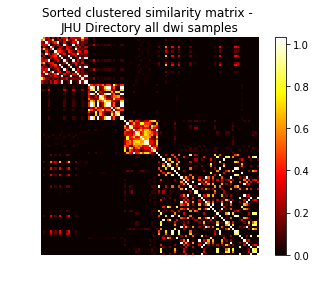

In [28]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Graphs')
plt.ylabel('Graphs')
plt.title("Sorted clustered similarity matrix - \nJHU Directory all dwi samples")
plt.axis('off')
plt.show()

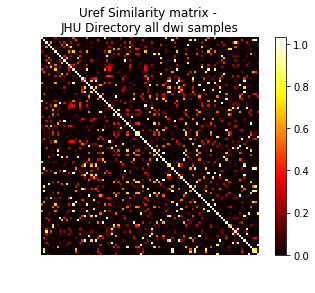

In [29]:
#create a heat map of the unsorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Graphs')
plt.ylabel('Graphs')
plt.title("Uref Similarity matrix - \nJHU Directory all dwi samples")
plt.axis('off')
plt.show()

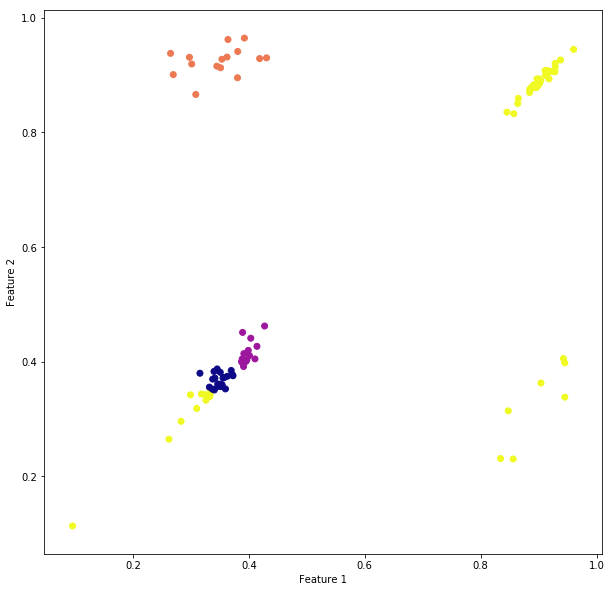

In [30]:
#Create a plot of the clusters color-coded as such

if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(mb.labels_)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    labels = mb.labels_
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')